---
# Unit 5.4: Verlet integration for simple harmonic oscillation


- The Verlet integration for $x$ and $v$ are given
\begin{align*}
x_{n+1} & =2x_{n}-x_{n-1}+a_{n}h^{2}\\
v_{n} & =\frac{x_{n+1}-x_{n-1}}{2h}
\end{align*}

- $\{x_0,x_1\}$ are needed for Verlet method.

- Let's apply Verlet for solving Simple Harmonic Oscillation.

$$m\ddot{x}=-kx\Rightarrow a=-\omega^{2}x $$

Thus, 

\begin{align*}
x_{n+1} & =2x_{n}-x_{n-1}+a_{n}h^{2}\\
 & =2x_{n}-x_{n-1}+\left(-\omega^{2}x_{n}\right)h^{2}
\end{align*}


okay


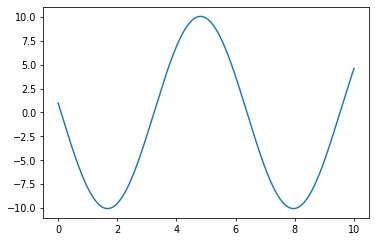

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# x_n_1 = 2. * x_n - x_n-1 + (-omega**2 * x_n) * h**2
h = 0.01 # step size for time discretization
Nt = 1000
total_time = Nt * h
omega = 1. # 
x_arr = np.zeros(Nt+1)
t_arr = np.linspace(0,total_time, Nt+1)
x0,x1 = 1.0, 0.9
x_arr[0] = x0
x_arr[1] = x1

for n in range(1,Nt):
    x_arr[n+1] = 2. * x_arr[n] - x_arr[n-1] - omega**2 * x_arr[n] * h**2 # Verlet method 
    #print (n)
    #print (x_arr[n+1])
print ("okay")
#===
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, x_arr)



#print (x_arr)
